#### Importando as LIBS

In [158]:

import numpy as np
import pandas as pd

import yfinance as yf
import openpyxl 
import datetime as dt

import seaborn as sns
import plotly.graph_objects as Dash
import plotly.express as px
import matplotlib.pyplot as plt


#### Importando os dados Ibovepa

In [159]:

ibovespa = yf.download(tickers='^BVSP', period='1y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


#### Verificando DataFrame

In [160]:

ibovespa.head(15)

Ticker,^BVSP
Date,
2024-01-22,126602.0
2024-01-23,128263.0
2024-01-24,127816.0
2024-01-25,128169.0
2024-01-26,128967.0
2024-01-29,128503.0
2024-01-30,127402.0
2024-01-31,127752.0
2024-02-01,128481.0


#### Valores duplicados

In [161]:
ibovespa.duplicated().sum()

np.int64(7)

#### Info

In [162]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-22 to 2025-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#### Estatisticas

In [163]:
ibovespa.describe()

Ticker,^BVSP
count,250.000000
mean,127698.376156
std,4159.738243
min,118533.000000
25%,125592.250000
50%,127780.000000
75%,129984.500000
max,137344.000000


#### Estilos do gráfico

In [164]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### média móvel

In [165]:
media_movel = ibovespa['^BVSP'].rolling(5).mean()

#### Gráfico

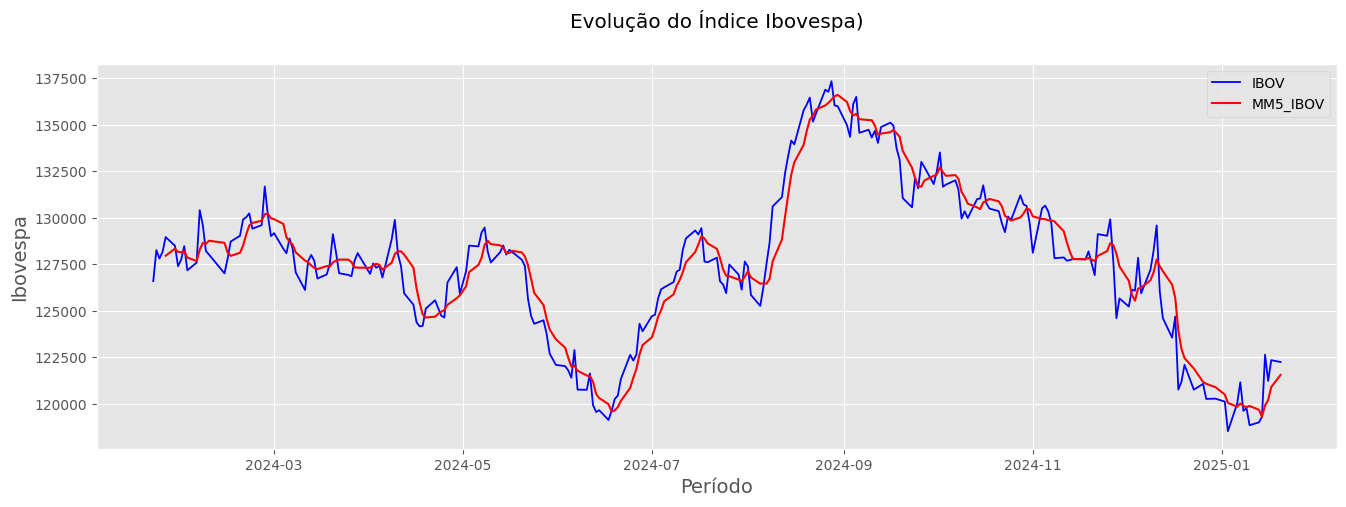

In [166]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


#### Carteira de ativos 

In [167]:
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='1y')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-18,NaN,12.841878,NaN
2024-01-19,NaN,12.622358,NaN
2024-01-22,30.790062,12.457718,32.793758
2024-01-23,31.173916,12.832730,33.176907
2024-01-24,30.937069,12.960784,32.882175
...,...,...,...
2025-01-14,36.820000,8.620000,52.930000
2025-01-15,37.290001,8.760000,54.160000
2025-01-16,37.049999,8.770000,53.669998


#### Informações da Carteira

In [168]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2024-01-18 to 2025-01-20
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  250 non-null    float64
 1   VALE      252 non-null    float64
 2   WEGE3.SA  250 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


#### Verificando valores nulos da carteira

In [169]:
carteira.isnull().sum()

Ticker
PETR4.SA    10
VALE         8
WEGE3.SA    10
dtype: int64

#### Mapa de calor nulos

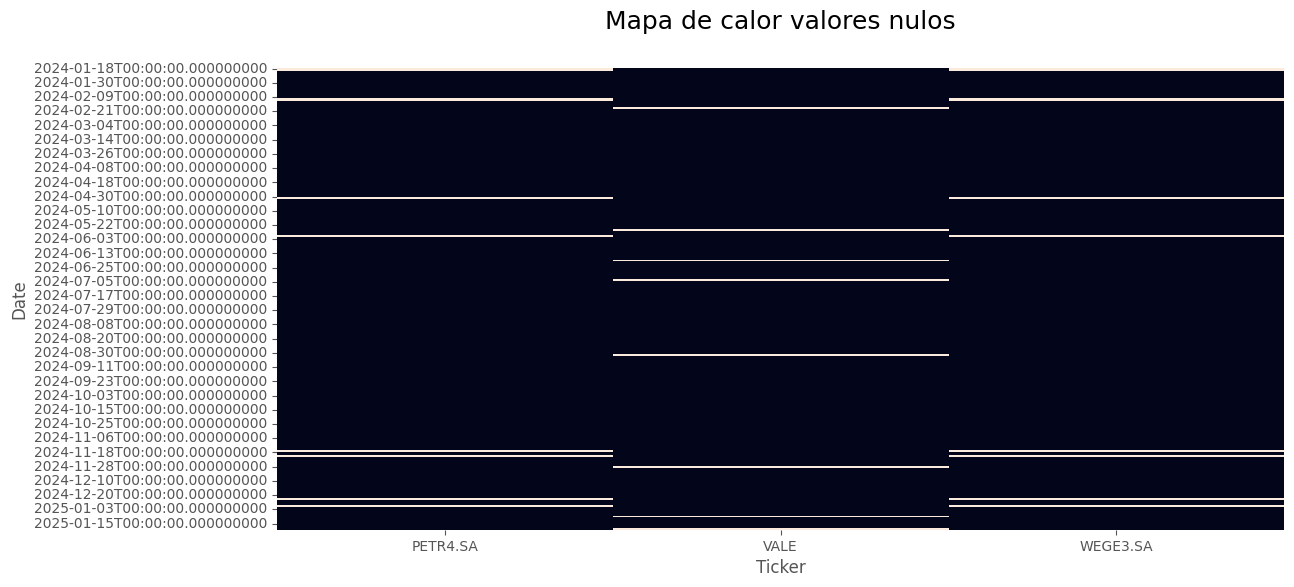

In [170]:
plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

#### Estatisticas da Carteira

In [171]:
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,250.000000,252.000000,250.000000
mean,33.956319,10.894174,45.796932
std,1.851114,1.068932,8.321522
min,29.115803,8.500000,31.772018
25%,32.912333,10.186540,37.944684
50%,34.005487,10.862503,46.364515
75%,35.072725,11.729400,53.922447
max,37.631561,12.960784,58.465912


#### Excluindo valores nulos da Carteira

In [172]:

carteira.dropna(inplace=True)

#### Informações da carteira após exclusao dos valores nulos 

In [173]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2024-01-22 to 2025-01-17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  242 non-null    float64
 1   VALE      242 non-null    float64
 2   WEGE3.SA  242 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB


#### Gráfico

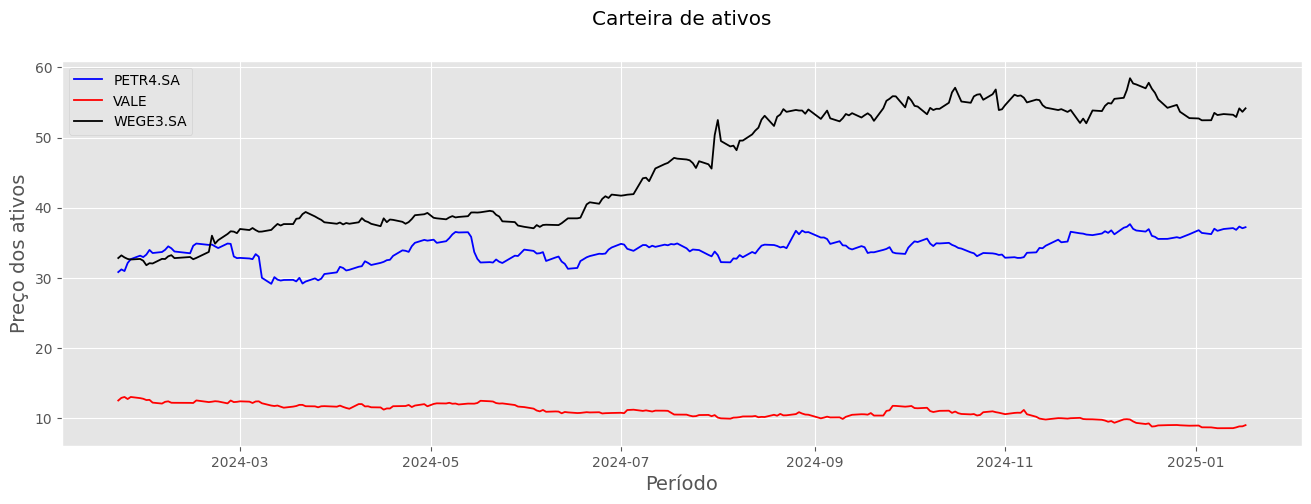

In [174]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();


#### Normalizando os dados do ibovespa

In [175]:
ibovespa_normalizado = ibovespa / ibovespa.iloc[0]
ibovespa_normalizado.head()

Ticker,^BVSP
Date,
2024-01-22,1.000000
2024-01-23,1.013120
2024-01-24,1.009589
2024-01-25,1.012377
2024-01-26,1.018681


#### Carteira Normalizada

In [176]:
carteira_normalizada = carteira / carteira.iloc[0]
carteira_normalizada.head()

Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-22,1.000000,1.000000,1.000000
2024-01-23,1.012467,1.030103,1.011684
2024-01-24,1.004774,1.040382,1.002696
2024-01-25,1.041910,1.016887,0.996105
2024-01-26,1.059947,1.040382,0.993709


#### Gráfico : Ativos da Carteira e IBOVESPA

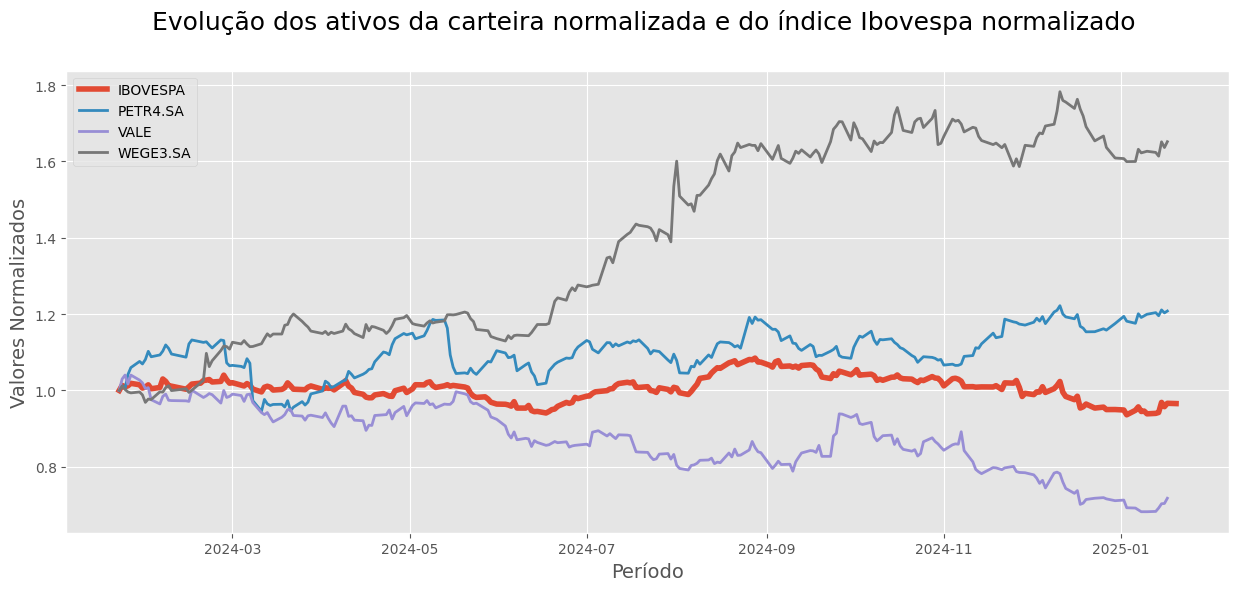

In [177]:
plt.figure(figsize=(15,6))
plt.title('Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ', fontsize=18, pad=30)
plt.plot(ibovespa_normalizado.index, ibovespa_normalizado['^BVSP'], linewidth=4, label= 'IBOVESPA')
plt.plot(carteira_normalizada.index, carteira_normalizada['PETR4.SA'], linewidth=2, label= 'PETR4.SA')
plt.plot(carteira_normalizada.index, carteira_normalizada['VALE'], linewidth=2, label= 'VALE')
plt.plot(carteira_normalizada.index, carteira_normalizada['WEGE3.SA'], linewidth=2, label= 'WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend();

In [178]:
# Gráfico de linhas
fig = px.line(ibovespa_normalizado,
               y='^BVSP',
               title='Variação do Ibovespa ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

In [179]:
# Criar dashboard


# Criando uma figura
figura = Dash.Figure()


# Adicionando o primeiro eixo
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['PETR4.SA'],
        mode='lines',
        name='PETR4.SA',
        marker_color='#ff7f0e',
        opacity=0.5,
    )
)



# Adicionando VALE
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['VALE'],
        mode='lines',
        name='VALE',
        marker_color='#d62728',
        opacity=0.5,
    )
)



# Adicionando a WEG3
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['WEGE3.SA'],
        mode='lines',
        name='WEGE3.SA',
        marker_color='#2ca02c'
    )
)

# Adicionando o IBOVESPA


figura.add_trace(
    Dash.Scatter(
        x=ibovespa_normalizado.index,
        y=ibovespa_normalizado['^BVSP'],
        mode='lines',
        name='IBOVESPA',
        marker_color='#4B0082'
    )
)



# Ajustes no layout
figura.update_layout(

    # título
    title='Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ',
    # Tamanho
    titlefont_size=20,
    
    # Ajustando o eixo x
    xaxis=dict(
        title='Período Histórico',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Ajustando o eixo y
    yaxis=dict(
        title='Valores Normalizados',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Parâmetros para Legenda
    legend=dict(
        x=1,
        y=1
    )

)




